# Lab 9 - Implementation of Blocks World Problem
Prince Samuvel S
RA1811027010099
CSE - Big Data

## AIM 
#### To solve the Blocks World Problem

*Let's consider A, B, C, D and E are uniform blocks. Each block can be placed on another block or on the table. The agent can perform only one action (given below) to solve by considering this problem as planning as state space search. We will be using* **A* Search Algorithm and Manhattan Distance to solve the problem**

## Given Goal State and Final State

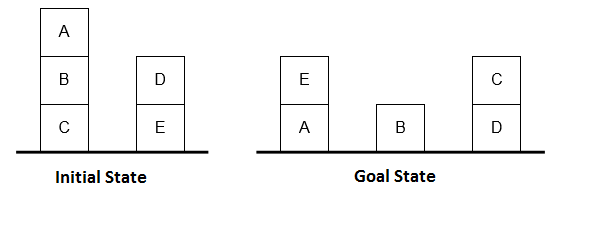


## Manual procedure 
---
We have an initial state, which it looks like this


|A| 

|B| |D|

|C| |E|

======== <-- table

We have a goal state, which it looks like this...

        
|E|. . . |C| 

|A| |B| |D|

=========== <-- table

Now to reach from initial state to goal state, we are allowed to move the blocks one at a time. We can either keep the block on the table or on top of another block. The solution for the above blocks world problem will be,

    Move A on table
    Move D on table
    Move B on table
    Move E above A
    Move C above D

## A* algorithm search Alogrithm
A* algorithm is a best first seach algorithm which works based on heuristic methods and this helps achieve optimality.At each iteration of its main loop, A* needs to determine which of its partial paths to expand into one or more longer paths. It does so based on an estimate of the cost (total weight) still to go to the goal node. Specifically, A* selects the path that minimizes f(n). The calculation of the value can be done as shown below

f(n)=g(n)+h(n)

g(n) = shows the shortest path’s value from the starting node to node n

h(n) = The heuristic approximation of the value of the node


In [1]:
# Importing necessary modules
import heapq
import re
import time
from collections import deque

"""A * search"""
def a_star_search(initial_state, goal_config):
    start_time = time.time()  # initialize timer
    frontier = Frontier().heap  # list of entries arranged in a heap
    entry_finder = {}  # mapping of states to entries
    explored = Explored().set  # a set of explored states

    # calculate initial's states h cost and add g cost (which is 0 so no need to add it)
    initial_state.f = h1(initial_state.config, goal_config)
    # add initial state
    add_state(initial_state, entry_finder, frontier)

    # initialize metrics variable
    nodes = 0
    max_depth = 0
    while frontier and time.time() - start_time < PERIOD_OF_TIME:
        # pop the state with the smaller cost from frontier
        state = pop_state(frontier, entry_finder)
        # check if the state has been explored
        if state.config not in explored:
            explored.add(state.config)
            # update max depth
            if max_depth < state.cost:
                max_depth = state.cost
            # check if the state is goal state
            if state.config == goal_config:
                print("Success - Solution Found")
                return state, nodes, max_depth
            # expand the state
            state.expand()
            nodes = nodes + 1
            for child in state.children:
                # calculate the cost f for child
                child.f = child.cost + h3(child.config, goal_config)
                # check for duplicates in frontier
                if child.config not in entry_finder:
                    add_state(child, entry_finder, frontier)
                # if child state is already in frontier update its cost if cost is less
                elif child.f < entry_finder[child.config][0]:
                    # update the priority of an existing state
                    remove_state(child.config, entry_finder)
                    add_state(child, entry_finder, frontier)
    print('FAILURE')
    exit()


class Frontier(object):
    def __init__(self):
        self.queue = deque()
        self.stack = deque()
        self.heap = []
        
    def __contains__(self, item):
        # custom method compares only configs
        if self.queue:
            for element in self.queue:
                if tuple(map(tuple, item.config)) == element.config:
                    return True
        elif self.stack:
            for element in self.stack:
                if tuple(map(tuple, item.config)) == element.config:
                    return True
        else:
            for element in self.heap:
                if item.config == element[1].config:
                    return True
        return False

class Explored(object):
    def __init__(self):
        self.set = set()
PERIOD_OF_TIME = 60

def add_state(state, entry_finder, frontier):
    """Add a new state """
    entry = [state.f, state]
    entry_finder[state.config] = entry
    heapq.heappush(frontier, entry)

def remove_state(config, entry_finder):
    """Mark an existing state as REMOVED."""
    entry = entry_finder.pop(config)
    entry[-1] = '<removed-task>'

def pop_state(frontier, entry_finder):
    """Remove and return the lowest cost state."""
    while frontier:
        state = heapq.heappop(frontier)
        if state[1] != '<removed-task>':
            del entry_finder[state[1].config]
            return state[1]

def h1(config, goal_config):
    """Heuristic 1 - this heuristic calculates the number of blocks that are currently not in the correct 'position'."""
    cost = 0
    index = 0
    for cube in config:

        if cube[1] != goal_config[index][1]:
            cost += 1
        index += 1
    return cost


def h3(config, goal_config):
    '''Heuristic 3 - this heuristic is similar to Heuristic 1. It calculates the difference between the current state
    and the goal state, but looks at the details of each block.'''
    cost = 0
    index = 0
    for cube in config:

        if cube[0] != goal_config[index][0] and cube[1] != goal_config[1]:
            cost += 2
        elif cube[0] != goal_config[index][0] or cube[1] != goal_config[1]:
            cost += 1
        index += 1
    return cost


def calculate_path_to_goal(state):
    """calculate the path to goal"""
    moves = []
    while state.parent is not None:
        moves.append(state.action)
        state = state.parent
    moves = moves[::-1]
    return moves

# check if cube1 is on table
def is_on_table(cube1):
    return cube1[1] == -1

In [2]:
# The Class that Represents the state of Cubes

class BlockState(object):
    def __init__(self, config, n, objects, parent=None, action="Initial", cost=0, f=0, ):
        self.n = n
        self.cost = cost  # int g cost
        self.parent = parent  # BlockState
        self.action = action  # string
        self.config = config
        self.children = []  # list
        self.f = f  # f cost
        self.objects = objects  # a string array which indicates in which place in config is every cube

    def expand(self):
        index_of_cube1 = 0
        for cube1 in self.config:
            # if cube1 is clear and free to move
            if cube1[0] == -1:
                # if cube1 is not on table move cube1 on table  and create a child(new configuration of cubes)
                if not is_on_table(cube1):
                    new_config = list(map(list, self.config))
                    # update config
                    new_config[cube1[1]][0] = -1
                    new_config[index_of_cube1][1] = -1
                    if not self.is_same_with_predecessor(new_config):
                        action = 'Move(' + self.objects[index_of_cube1] + ',' + self.objects[cube1[1]] + ',table)'
                        # create child
                        child = BlockState(tuple(map(tuple, new_config)), self.n, self.objects, parent=self, action=action, cost=self.cost + 1)
                        # update child
                        self.children.append(child)

                # find others free cubes and save their indexes
                clear_cubes_indexes = self.find_others_free_cubes(index_of_cube1)
                # if there are free cubes move cube1 over other free cube and create a child(new configuration of cubes)
                for index_of_cube2 in clear_cubes_indexes:
                    new_config = list(map(list, self.config))
                    # update config
                    new_config[index_of_cube2][0] = index_of_cube1
                    new_config[index_of_cube1][1] = index_of_cube2
                    if not is_on_table(cube1):
                        new_config[cube1[1]][0] = -1
                    if not self.is_same_with_predecessor(new_config):
                        if is_on_table(cube1):
                            action = 'Move(' + self.objects[index_of_cube1] + ',' + 'table' + ',' + self.objects[index_of_cube2] + ')'
                        else:
                            action = 'Move(' + self.objects[index_of_cube1] + ',' + self.objects[cube1[1]]+ ',' + self.objects[index_of_cube2] + ')'
                        # create child
                        child = BlockState(tuple(map(tuple, new_config)), self.n, self.objects, parent=self, action=action, cost=self.cost + 1)
                        # append on children's list
                        self.children.append(child)
            index_of_cube1 += 1

    # find and return indexes of free cubes except cube1's index
    def find_others_free_cubes(self, index_of_cube1):
        clear_cubes_indexes = []
        index_of_cube2 = 0
        for cube2 in self.config:
            if cube2[0] == -1 and index_of_cube2 != index_of_cube1:
                clear_cubes_indexes.append(index_of_cube2)
            index_of_cube2 += 1
        return clear_cubes_indexes

    def is_same_with_predecessor(self, new_config):
        state = self
        if state.parent is not None:
            if list(map(list, state.parent.config)) == new_config:
                return True
        return False

    def __eq__(self, other):
        if type(other) is str:
            return False
        return self.config == tuple(map(tuple, other.config))

    def __lt__(self, other):
        if type(other) is str:
            return False
        return self.config < tuple(map(tuple, other.config))

    def __gt__(self, other):
        if type(other) is str:
            return False
        return self.config > tuple(map(tuple, other.config))

### Driver Code

In [3]:
def main():
    
    solution=""
    objects=['A', 'D', 'C', 'E', 'B']
    begin_config=((-1, 4), (-1, 3), (4, -1), (1, -1), (0, 2))
    goal_config=((3, -1), (2, -1), (-1, 1), (-1, 0), (-1, -1))
    initial_state = BlockState(begin_config, len(begin_config), objects)
    state, nodes, max_depth = a_star_search(initial_state, goal_config)
    moves = calculate_path_to_goal(state)
    solution=solution+str(moves)
    
    print("\nNumber of Moves:", state.cost)
    print("Nodes expanded in search tree:", nodes)
    print("Maximum Search Depth", max_depth)
    print("\nMoves\n")
    solution=solution.strip("[]").split(", ")
    for x in range(1,len(solution)+1):
        print(x,")",solution[x-1])

if __name__ == '__main__':
    main()


Success - Solution Found

Number of Moves: 5
Nodes expanded in search tree: 21
Maximum Search Depth 5

Moves

1 ) 'Move(A,B,table)'
2 ) 'Move(D,E,table)'
3 ) 'Move(B,C,table)'
4 ) 'Move(C,table,D)'
5 ) 'Move(E,table,A)'


## Result 
---
We have successfully found out the solution to the blocksworld problem using the A* algorithm & python programming.